### Ritter et al. (2022), J Seismol: **Fig. S4 right** - SKS-SKKS pairs in the lowermost mantle related to SWSMs at BFO

-----------------------------------------------------------------------
> This [Jupyter notebook](https://jupyter.org/) (supported by [JupyterLab](https://jupyter.org/)) reproduces **Fig. S4 right** of **_Ritter J R R, Fröhlich Y, Sanz Alonso Y, Grund M (2022)_**. Short-scale laterally varying SK(K)S shear wave splitting at BFO, Germany – implications for the determination of anisotropic structures. _Journal of Seismology_, 26, 1137-1156. https://doi.org/10.1007/s10950-022-10112-w. https://doi.org/10.1007/s10950-023-10136-w.
>
- **Author**: Yvonne Fröhlich
  * ORCID: https://orcid.org/0000-0002-8566-0619
  * GitHub: https://github.com/yvonnefroehlich/gmt-pygmt-plotting
- **History**: PyGMT and GMT versions which must be installed on your system to run this Jupyter notebook
  * Created 2022/July: [**PyGMT**](https://www.pygmt.org/latest/) [v0.7.0](https://www.pygmt.org/v0.7.0/) + [**GMT**](https://www.generic-mapping-tools.org/) [6.4.0](https://docs.generic-mapping-tools.org/6.4/)
  * Updated 2024/04/07: [**PyGMT**](https://www.pygmt.org/latest/) [v0.11.0](https://www.pygmt.org/v0.11.0/) + [**GMT**](https://www.generic-mapping-tools.org/) [6.4.0](https://docs.generic-mapping-tools.org/6.4/)
  * Updated 2025/08/28: [**PyGMT**](https://www.pygmt.org/latest/) [v0.16.0](https://www.pygmt.org/v0.16.0/) + [**GMT**](https://www.generic-mapping-tools.org/) [6.5.0](https://docs.generic-mapping-tools.org/6.5/)
- **See also**:
  * [Fig. S4 left](https://github.com/yvonnefroehlich/gmt-pygmt-plotting/blob/main/001_paper_RFSG_2022/Figure_S4/RFSG_FigS4_left_swsm.ipynb): Piercing points in the lowermost mantle related to SWSMs at BFO
  * [Fig. 1](https://github.com/michaelgrund/GMT-plotting/blob/main/010_paper_RFSG2022/RFSG_2022_Fig_01.ipynb): Piercing points in the upper mantle related to SWSMs at BFO

For bug reports, suggestions, or recommendation please open an issue or submit a pull request directly on [GitHub](https://github.com/yvonnefroehlich/gmt-pygmt-plotting).

-----------------------------------------------------------------------

Import the packages used in this Jupyter notebook.

In [1]:
import pygmt as gmt

---------------

**(1) Set up**

---------------

In [2]:
# -----------------------------------------------------------------------------
# General stuff
myfontsize = "9p"
dpi_png = 360  # resolution in dpi of output figure for PNG format
dpi_jn = 100  # resolution in dpi for display in this Jupyter notebook
fname_fig_out = "RFSG_FigS4_right_pairs"  # name of output figure

# -----------------------------------------------------------------------------
# Coordinates of recording station Black Forest Observatory BFO
lon_BFO = 8.330  # degrees East
lat_BFO = 48.331  # degrees North

# -----------------------------------------------------------------------------
# Plate boundaries after Bird 2003
file_platbound = "plate_boundaries_Bird_2003.txt"

# -----------------------------------------------------------------------------
# Colors
color_land = "gray90"  # gray hue -> light gray
color_platbound = "216.750/82.875/24.990"  # -> dark orange
color_station_symbol = "255/215/0"  # = "gold"
color_station_label = "162/20/47"  # -> dark red
color_null = "white"

color_SKS_nodisc = "gray50"
color_SKKS_nodisc = "gray50"
color_SKS_disc = "205/0/0"  # -> red
color_SKKS_disc = "238/118/0"  # -> orange

color_line = "gray50"
color_pp_K = color_SKS_nodisc
color_pp_KK = color_SKKS_nodisc
color_pp_N = color_null

# -----------------------------------------------------------------------------
# Piercing points
marker_size_pp_nodisc = "0.1c"  # centimeters
marker_size_pp_disc = "0.1c"
line_width_pp_nodisc = "0.2p"  # points
line_width_pp_disc = "0.2p"
outline_width_pp = "0.6p"
alpha_pp = "@30"  # transparency in percentage (0 equals opaque)
incols_pp = [7, 8]  # order of input columns, zero-based indexing

# -----------------------------------------------------------------------------
# Box around map scale, legends, colorbars
# +g fill color
# +p outline thickness and color
# +r rounded edges
box_standard = "+gwhite@30+p0.8p,black+r"

Set map projection and region of study area:
- [Lambert Conic Conformal Projection](https://www.pygmt.org/v0.16.0/projections/conic/conic_lambert.html): **L** `lon0/lat0/lat1/lat2/width`

In [3]:
# -----------------------------------------------------------------------------
# Projection

# Define projection center
lon0_lamb = 7  # degrees East
lat0_lamb = 48  # degrees North

# Define standard parallels (only these two are distortion-free)
lat1_lamb = 45  # degrees North
lat2_lamb = 55

# Define width of map
width_lamb = "15c"  # 15 centimeters

projection = f"L{lon0_lamb}/{lat0_lamb}/{lat1_lamb}/{lat2_lamb}/{width_lamb}"

# -----------------------------------------------------------------------------
# Region
lonmin_lamb = -35  # degrees East
lonmax_lamb = abs(lonmin_lamb) + 2 * lon0_lamb  # symmetric around lon0
latmin_lamb = 25  # degrees North
latmax_lamb = 70

region = [lonmin_lamb, lonmax_lamb, latmin_lamb, latmax_lamb]

------------------------------

**(2) Create geographic map**

------------------------------

Using the [`pygmt.Figure.show`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.show.html) method you can let the figure be displayed directly inside your IDE (Integrated Development Environment) or outside of it by setting the `method` parameter to `"external"`.

Create an instance or object of the [`pygmt.Figure`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.html) class. In the following steps various plotting elements are added in a stacking fashion.

In [4]:
fig = gmt.Figure()
gmt.config(MAP_GRID_PEN="0.01p,gray50")

Generate a basic map using the [`pygmt.Figure.basemap`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.basemap.html) and [`pygmt.Figure.coast`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.coast.html) methods.

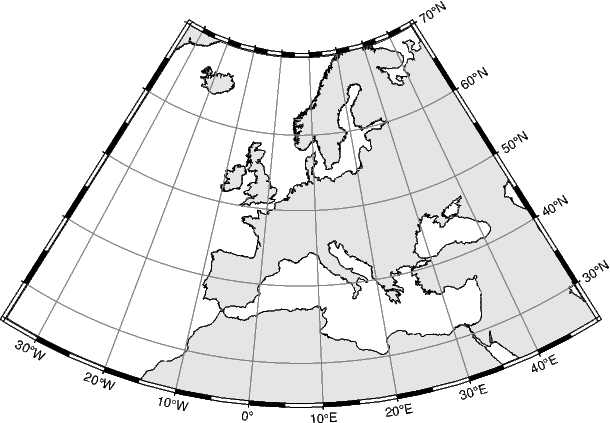

In [5]:
# a annotations, here every 10 degrees
# g grid lines, here every 10 degrees
# f frame / ticks, here every 5 degrees
# wSnE annotations at South and East boundaries
frame = ["a10g10f5", "wSnE"]

fig.basemap(projection=projection, region=region, frame=0)
fig.coast(
    land=color_land,
    resolution="h",  # high
    area_thresh="30000",
    shorelines="black",
)
fig.basemap(frame=frame)

fig.show(dpi=dpi_jn)

Plot the plate boundaries ([Bird 2003](https://doi.org/10.1029/2001GC000252)) using the [`pygmt.Figure.plot`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.plot.html) method.

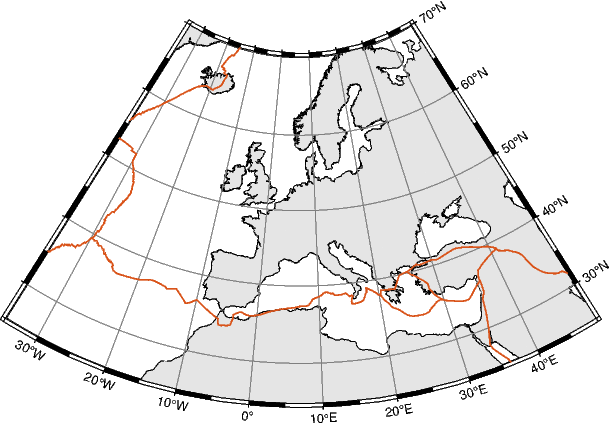

In [6]:
fig.plot(data=file_platbound, pen=f"0.8p,{color_platbound}")

fig.show(dpi=dpi_jn)

Plot connection lines between related SKS and SKKS phases (SKS-SKKS pairs).

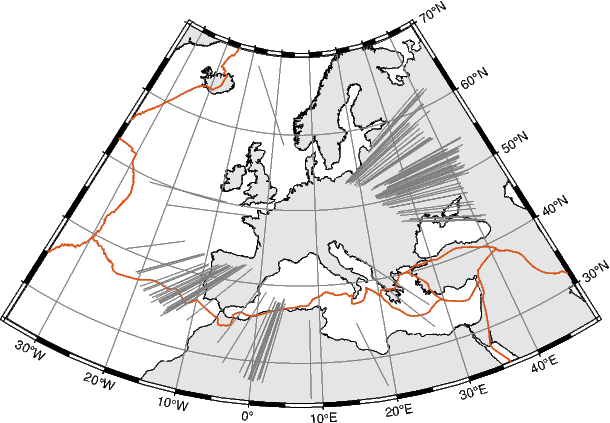

In [7]:
path_conect = "data_FigS4_right_pairs/"

# DISCREPANT
# SKKS split and SKS null
fig.plot(
    data=f"{path_conect}BFO_disc_pp2700km_KKNN2KN_all.txt",
    pen=f"{line_width_pp_disc},{color_line}",
)
# SKKS null and SKKS split
fig.plot(
    data=f"{path_conect}BFO_disc_pp2700km_KKN2KNN_all.txt",
    pen=f"{line_width_pp_disc},{color_line}",
)

# SAME
# SKKS null and SKS null
fig.plot(
    data=f"{path_conect}BFO_same_pp2700km_KKN2KN_all.txt",
    pen=f"{line_width_pp_nodisc},{color_line}",
)
# SKKS split and SKS split
fig.plot(
    data=f"{path_conect}BFO_same_pp2700km_KKNN2KNN_all.txt",
    pen=f"{line_width_pp_nodisc},{color_line}",
)

fig.show(dpi=dpi_jn)

Plot the piercing points in 2700 km depth (externally and previously calculated after the _iasp91_ Earth model ([Kennett & Engdahl 1991](https://doi.org/10.1111/j.1365-246X.1991.tb06724.x))).

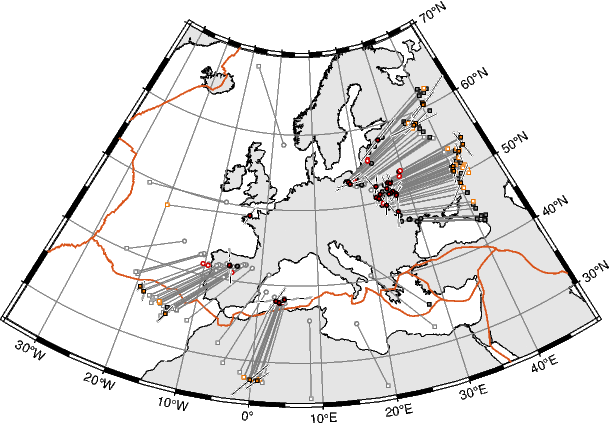

In [8]:
data_same_pp_same = "data_FigS4_right_pairs/BFO_same_pp2700km_"
data_same_K_N_pp = f"{data_same_pp_same}K_sp_N_all.txt"
data_same_K_NN_pp = f"{data_same_pp_same}K_sp_NN_all.txt"
data_same_KK_N_pp = f"{data_same_pp_same}KK_sp_N_all.txt"
data_same_KK_NN_pp = f"{data_same_pp_same}KK_sp_NN_all.txt"

data_disc_pp_same = "data_FigS4_right_pairs/BFO_disc_pp2700km_"
data_disc_K_N_pp = f"{data_disc_pp_same}K_sp_N_all.txt"
data_disc_K_NN_pp = f"{data_disc_pp_same}K_sp_NN_all.txt"
data_disc_KK_N_pp = f"{data_disc_pp_same}KK_sp_N_all.txt"
data_disc_KK_NN_pp = f"{data_disc_pp_same}KK_sp_NN_all.txt"


# SAME both null
# null, SKS
fig.plot(
    data=data_same_K_N_pp,
    style=f"C{marker_size_pp_nodisc}",  # circle
    fill=color_pp_N,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},{color_pp_K}",  # outline thickness and color
    incols=incols_pp,  # order of input columns, zero-based indexing
)
# null, SKKS
fig.plot(
    data=data_same_KK_N_pp,
    style=f"S{marker_size_pp_nodisc}",  # square
    fill=color_pp_N,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},{color_pp_KK}",
    incols=incols_pp,
)

# SAME both split
# split, SKS
fig.plot(
    data=data_same_K_NN_pp,
    style=f"C{marker_size_pp_nodisc}",
    fill=color_pp_K,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},black",
    incols=incols_pp,
)
# split, SKKS
fig.plot(
    data=data_same_KK_NN_pp,
    style=f"S{marker_size_pp_nodisc}",
    fill=color_pp_KK,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},black",
    incols=incols_pp,
)

# DISCREPANT null
# null, SKS
fig.plot(
    data=data_disc_K_N_pp,
    style=f"C{marker_size_pp_disc}",
    fill=color_pp_N,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},{color_SKS_disc}",
    incols=incols_pp,
)
# null, SKKS
fig.plot(
    data=data_disc_KK_N_pp,
    style=f"S{marker_size_pp_disc}",
    fill=color_pp_N,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},{color_SKKS_disc}",
    incols=incols_pp,
)

# DISCREPANT split
# split, SKS
fig.plot(
    data=data_disc_K_NN_pp,
    style="J",  # orientated rectangle
    fill="black",  # before PyGMT v0.8.0 "color"
    pen="0.05p,white",
    incols="7,8,9,10+s250,13+s150",
)
# split, SKKS
fig.plot(
    data=data_disc_KK_NN_pp,
    style="J",
    fill="black",  # before PyGMT v0.8.0 "color"
    pen="0.05p,white",
    incols="7,8,9,10+s250,13+s150",
)
# split, SKS
fig.plot(
    data=data_disc_K_NN_pp,
    style=f"C{marker_size_pp_disc}",  # circle
    fill=color_SKS_disc,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},black",
    incols=incols_pp,
)
# split, SKKS
fig.plot(
    data=data_disc_KK_NN_pp,
    style=f"S{marker_size_pp_disc}",
    fill=color_SKKS_disc,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},black",
    incols=incols_pp,
)

fig.show(dpi=dpi_jn)

Add symbol and station code of recording station BFO using the [`pygmt.Figure.plot`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.plot.html) and [`pygmt.Figure.text`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.text.html) methods.

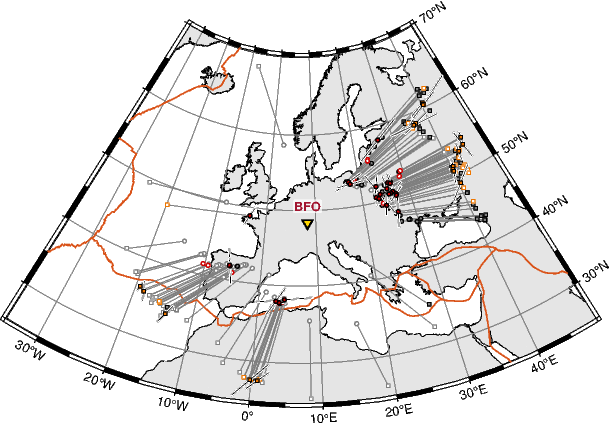

In [9]:
# Add symbol
fig.plot(
    x=lon_BFO,
    y=lat_BFO,
    style="i0.3c",  # inverse triangle
    fill=color_station_symbol,  # before PyGMT v0.8.0 "color"
    pen="1p,black",
)

# Add station code
fig.text(
    x=lon_BFO,
    y=49.020,
    text="BFO",
    font=f"9p,Helvetica-Bold,{color_station_label}",
    offset="0c/0.3c",  # x/y
    fill="white@30",
    clearance="+tO",  # rounded edges of box
)

fig.show(dpi=dpi_jn)

Add legend for symbols of SKS-SKKS pairs and length of delay time using the [`pygmt.Figure.legend`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.legend.html) method.

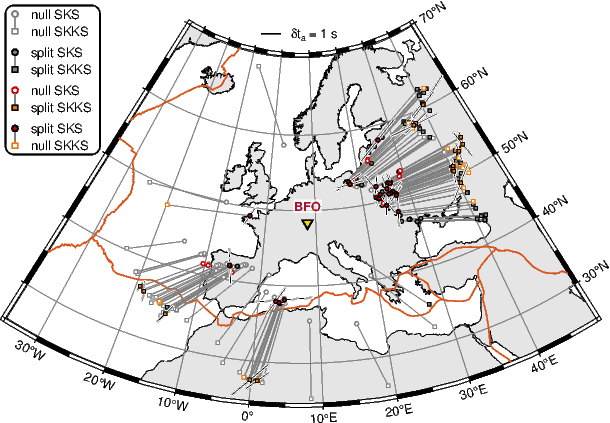

In [10]:
# -----------------------------------------------------------------------------
# Add legend for symbols of SKS-SKKS pairs
leg_file_pp = "legend_gmt_pairs.txt"

# J reference point, here outside of map bounding box Left Top
# +j anchor point, here Left Top
# +w width, here in centimeters
# +o offset x/y, here in centimeters
leg_pos_pp = "JLT+jLT+w2.4c+o0c/-0.5c"

fig.legend(spec=leg_file_pp, position=leg_pos_pp, box=box_standard)

# -----------------------------------------------------------------------------
# Add legend for length of delay time
leg_file_dt = "legend_gmt_dt.txt"
leg_pos_dt = "JMT+jLT+o-1.4c/0c"
fig.legend(spec=leg_file_dt, position=leg_pos_dt)

fig.show(dpi=dpi_jn)

Using the [`pygmt.Figure.savefig`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.savefig.html) method you can save the final figure. Indicate the desired file format by adding the corresponding extension to the file name passed through the `fname` parameter. For PNG format you may also set the resolution via the `dpi` parameter.

In [11]:
# Uncomment to save the figure in PNG, PDF, or EPS format
# for ext in ["png"]: #, "pdf", "eps"]:
#   fig.savefig(fname=f"{fname_fig_out}.{ext}", dpi=dpi_png)

print(fname_fig_out)

RFSG_FigS4_right_pairs
